In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from Package.HWFourLayers import FourLayerNet
import pickle, math, cv2,os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def show_img(img, label_array, label,star_num = 0, stop_num = 10):
    
    #__________ show gray images ____________

    plt.figure(figsize=[5,5],dpi=100)
    plt.suptitle("display 0-9 image pictures as gray mode")
    
    for i in range(star_num, stop_num):
        plt.subplot(math.ceil((stop_num - star_num)/5),5,i+1-star_num)
        plt.title(str(i)+" ->"+str(label[np.argmax(label_array[i])]))
        plt.xticks([])
        plt.yticks([])
        
        plt.imshow(array2img((img[i]*255).reshape(32,32)))
    
    plt.show()
    
def array2img(img):
    pil_img = Image.fromarray(np.uint8(img))
   # pil_img.show()
    return pil_img

## Incoud Dataset

In [3]:
# 輸入資料
with open ('Carplate_dataset.pkl','rb') as f:
    x=pickle.load(f)
    t=pickle.load(f)
    label=pickle.load(f)

#打亂資料
times = 100
for i in range(times):
    batch_mask = np.random.choice(len(x),len(x))
    x = x[batch_mask]
    t = t[batch_mask]

#資料切割
indices = [int(len(x) * n) for n in [0.7, 0.7 + 0.2]]  # 建立比例值矩陣  訓練:測試:驗證  0.7 0.2 0.1
x_train, x_test, x_val= np.split(x, indices)
t_train, t_test, t_val= np.split(t, indices)

__________show the original images__________


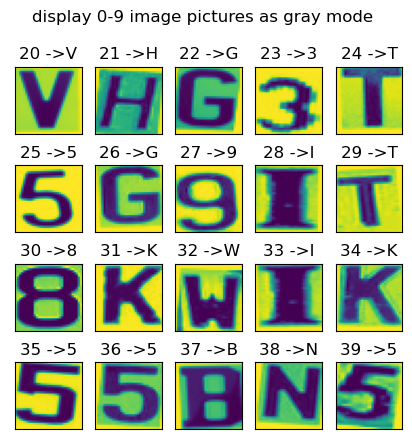

In [4]:
print("__________show the original images__________")
show_img(x_train, t_train, label, star_num = 20, stop_num = 40)   # num can enter Quantity 


## Network

In [5]:
network = FourLayerNet(input_size=1024, hidden_size_1=150, hidden_size_2=200, hidden_size_3=100, output_size=35)

In [8]:
iters_num = 1000
train_size = x_train.shape[0]
batch_size = 600

train_loss_list = []
train_acc_list = []
test_acc_list = []

''' 60000/100 ==> 600   總筆數/每次 size '''
iter_per_epoch = max(train_size / batch_size, 1)
print(iter_per_epoch)
times = 0

9.001666666666667


## Train

In [9]:
learning_rate = 0.1
for i in range(iters_num):
    ''' 打亂資料 '''
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配
    #grad = network.numerical_gradient(x_batch, t_batch)
    ''' 誤差反向 求損失 '''
    grad = network.gradient(x_batch, t_batch)
    
    # 更新
    ''' 更新參數 '''
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3', 'W4', 'b4'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    if int(i % iter_per_epoch) == 0:
        times += 1
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('訓練週期',times,"訓練成功率：", "{:.3f}".format(train_acc), "測試成功率", "{:.3f}".format(test_acc))

訓練週期 1 訓練成功率： 0.063 測試成功率 0.065
訓練週期 2 訓練成功率： 0.063 測試成功率 0.065
訓練週期 3 訓練成功率： 0.063 測試成功率 0.065
訓練週期 4 訓練成功率： 0.063 測試成功率 0.065
訓練週期 5 訓練成功率： 0.063 測試成功率 0.065
訓練週期 6 訓練成功率： 0.063 測試成功率 0.065
訓練週期 7 訓練成功率： 0.063 測試成功率 0.065
訓練週期 8 訓練成功率： 0.063 測試成功率 0.065
訓練週期 9 訓練成功率： 0.063 測試成功率 0.065
訓練週期 10 訓練成功率： 0.100 測試成功率 0.104
訓練週期 11 訓練成功率： 0.051 測試成功率 0.054
訓練週期 12 訓練成功率： 0.051 測試成功率 0.054
訓練週期 13 訓練成功率： 0.083 測試成功率 0.081
訓練週期 14 訓練成功率： 0.091 測試成功率 0.089
訓練週期 15 訓練成功率： 0.108 測試成功率 0.103
訓練週期 16 訓練成功率： 0.168 測試成功率 0.159
訓練週期 17 訓練成功率： 0.115 測試成功率 0.107
訓練週期 18 訓練成功率： 0.115 測試成功率 0.107
訓練週期 19 訓練成功率： 0.114 測試成功率 0.106
訓練週期 20 訓練成功率： 0.129 測試成功率 0.119
訓練週期 21 訓練成功率： 0.168 測試成功率 0.159
訓練週期 22 訓練成功率： 0.133 測試成功率 0.124
訓練週期 23 訓練成功率： 0.160 測試成功率 0.151
訓練週期 24 訓練成功率： 0.115 測試成功率 0.107
訓練週期 25 訓練成功率： 0.115 測試成功率 0.107
訓練週期 26 訓練成功率： 0.115 測試成功率 0.107
訓練週期 27 訓練成功率： 0.127 測試成功率 0.119
訓練週期 28 訓練成功率： 0.151 測試成功率 0.147
訓練週期 29 訓練成功率： 0.160 測試成功率 0.151
訓練週期 30 訓練成功率： 0.144 測試成功率 0.135
訓練週期 31 訓練成功率： 0.12

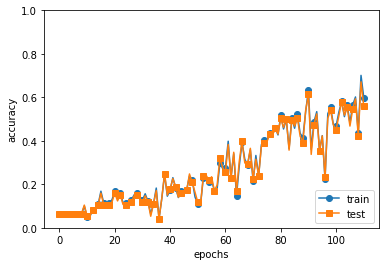

In [10]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 儲存模型

In [ ]:
with open ('Carplate_weight.pkl', 'wb') as f:
    pickle.dump(network.params,f,True)

In [ ]:
print(network.params['W2'])

[[-0.0225999   0.00421576 -0.00168795 ...  0.11032438 -0.00540068
  -0.0069162 ]
 [-0.00600137  0.01895916 -0.01391903 ...  0.01373453 -0.00971692
  -0.00869058]
 [ 0.11039873  0.02657046  0.06023698 ... -0.0059964   0.05822959
  -0.00231615]
 ...
 [-0.0055406  -0.00175487 -0.01608678 ...  0.00237181  0.01623532
   0.00388047]
 [ 0.00946632  0.00277463  0.0052231  ... -0.01699649  0.00424615
  -0.01455053]
 [ 0.14219182  0.01212878  0.07406871 ... -0.00608848  0.06483303
  -0.00826577]]


## Pre

In [ ]:
# x ,t = get_data()
x=x_val
t=t_val
accuracy_cnt = 0




for i in range(len(x)):
    y= network.predict(x[i:i+1])
    p= np.argmax(y) # obtain index value of the highest prediction result 
    #print("The "+str(i)+"th image predict as : ", label[p] ," ."+" The actual value should be : "+ str(label[np.argmax(t[i])]))

    if label[p] == str(label[np.argmax(t[i])]):
        accuracy_cnt += 1
            
            
print(" Accuracy: " + str(float(accuracy_cnt)/len(x)))


 Accuracy: 0.594559585492228
